In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize
import nltk
from nltk.corpus import stopwords
import glob
import os
import string
import numpy
import re
import pandas as pd
import gensim
import random
from gensim.models import KeyedVectors
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [43]:
os.chdir("D://Scriptie//Data//models")
list_mod = glob.glob('*w2v')
list_mod

['1815_10yp_bigrams_model.w2v',
 '1825_10yp_bigrams_model.w2v',
 '1835_10yp_bigrams_model.w2v',
 '1845_10yp_bigrams_model.w2v',
 '1855_10yp_bigrams_model.w2v',
 '1865_10yp_bigrams_model.w2v',
 '1875_10yp_bigrams_model.w2v',
 '1885_10yp_bigrams_model.w2v',
 '1895_10yp_bigrams_model.w2v',
 '1905_10yp_bigrams_model.w2v']

In [44]:
def GetRelations(word1, word2, year):
    df = list()

    for i in [year]:
        mfn = [m for m in list_mod if int(m[0:4]) == i]
        m = KeyedVectors.load(mfn[0], mmap='r')

        for w in [k for k,v in dict(m.wv.vocab).items() if word1 in k]:
            tmp = dict(m.most_similar(w, topn=100000))

            for x in [x for x,y in tmp.items() if y > 0.45]:
                if word2 in x:
                    weight = m.similarity(w,x)
                    t = [w,x,weight,i]
                    df.append(t)
    d = pd.DataFrame([[a for a,b,c,d in df], [b for a,b,c,d in df], [c for a,b,c,d in df], [d for a,b,c,d in df]]).T
    d.columns = ['source', 'target', ' weight', 'year']
    #d['degree'] = 1
    return d

In [47]:
def Plot(year,d, limit, fn):
    os.chdir("D://Scriptie//Data//models")
    dt = d
    #dt = dt[dt.groupby('source').source.transform(len) > limit]
    
    #new_df = pd.DataFrame()
    
    #for i in list(set(dt['source'])):
        
     #   tmp = dt[dt['source'] == i]
        
     #   if len(tmp) > 4:
     #       tmp = tmp.sort_values(by=' weight', ascending = False)
     #       tmp = tmp.iloc[:3,:]
     #       tmp['source'] = tmp['source'] + " (S)"
      #      new_df = new_df.append(tmp)
      #  else:
      #      new_df = new_df.append(tmp)
        
    #dt = new_df
    B = nx.Graph()
    B.add_nodes_from(dt['source'], bipartite=0)
    B.add_nodes_from(dt['target'], bipartite=1)
    B.add_weighted_edges_from(
        [(row['source'], row['target'], 1) for idx, row in dt.iterrows()], 
        weight='weight')

    pos = {node:[0, i] for i,node in enumerate(dt['source'])}
    pos.update({node:[1, i] for i,node in enumerate(dt['target'])})
    #nx.draw(B, pos, with_labels=False)
    #for p in pos:  # raise text positions
    #    pos[p][1] += 0.1

    #    plt.figure(6,figsize=(10,18)) 

        #colors = range(len(list_edges))

    plt.figure(6,figsize=(10,20)) 
    nx.draw(B, 
            with_labels = True, 
            node_size = 20, 
            font_size = 23,
            edge_color = "lightsteelblue", 
            #edge_cmap = plt.get_cmap('Blues'),
            node_color = "lightsteelblue",
            pos = pos)
    #nx.draw_networkx_labels(B, pos)

    x_values, y_values = zip(*pos.values())
    x_max = max(x_values)
    x_min = min(x_values)
    x_margin = (x_max - x_min) * 0.6
    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.title(str(year), fontsize = 60)
    #os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//Visualizations//CH2//source-files")
    os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//Visualizations//Poster")
    
    #plt.savefig(fn, format = 'png', dpi = 600, bbox_inches = "tight")
    os.chdir("D://Scriptie//Data//models")

    plt.show()

In [46]:
d = pd.DataFrame()
for w in ['onzekere_','onrustige_', 'onberekenbare_']:
    t = GetRelations(w,'buitenlandsche_', 1905)
    d = d.append(t)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  del sys.path[0]


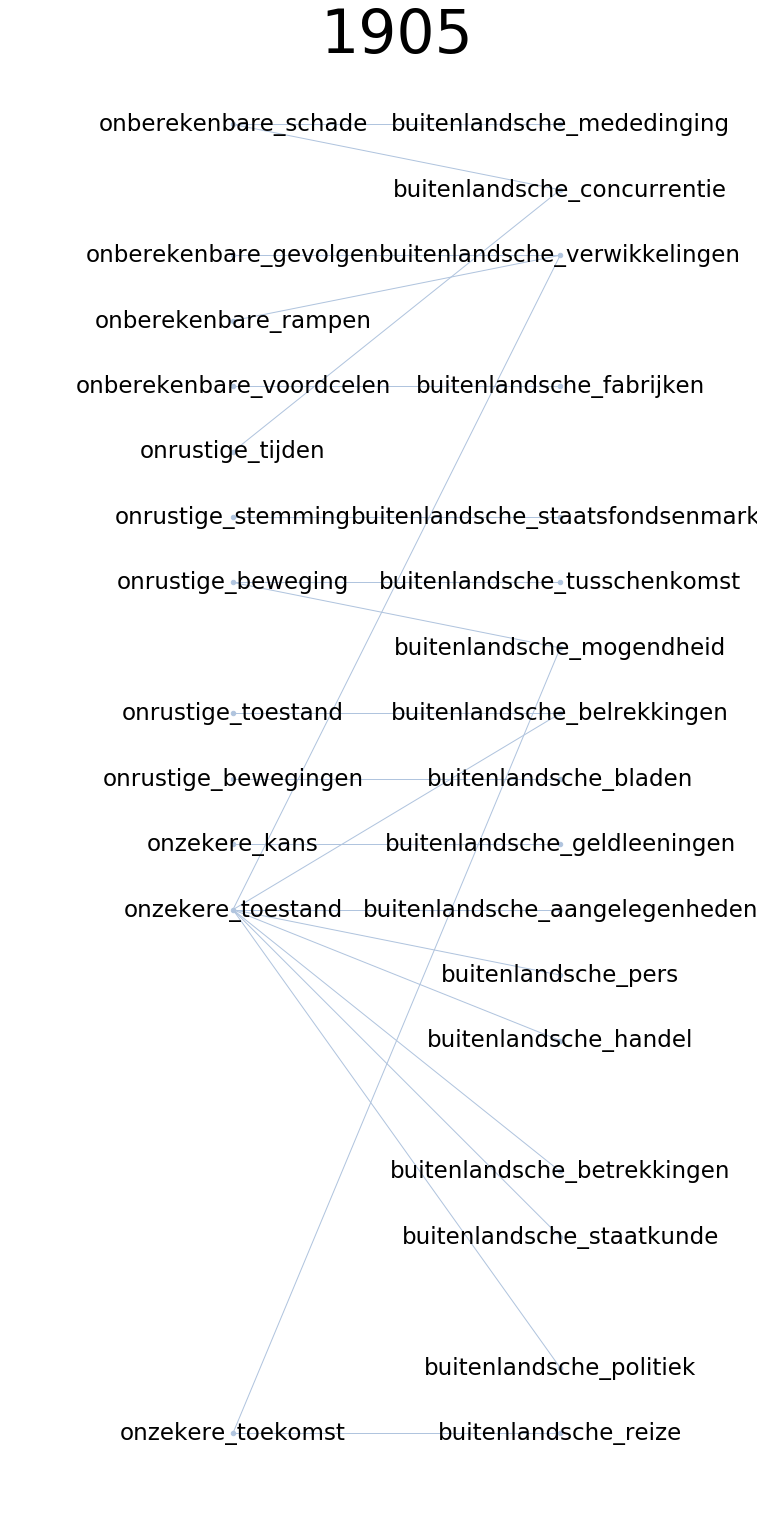

In [48]:
Plot(1905, d, 6, "related_bigrams_1905.png")

In [49]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//Visualizations//Poster")
d.to_csv('bigram_relations.csv', index=False)